# Table of Contents

01 Importing Libraries and Data <br/>
02 K-mean Clustering
- Preparing Data
- Elbow Technique
- Running k-means algorithm

03 Visualizing k-means algorithm
- Descriptive Statistics
- Reflection

# 01 Importing Libraries and Data

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Importing Data

In [4]:
# Creating basic path
path = "A:\Python\World Happiness Project"

In [6]:
# Importing Merged World Happiness Report
df_whr_M = pd.read_csv(os.path.join(path, '02 Data' , 'Prepared Data', 'WHRMerged.csv'),index_col = False)

# 02 k-means Clustering

## Preparing Data

In [7]:
# Creating Subsets of Data (Removing Year and Country columns)

subM = df_whr_M[['Happiness Score','GDP per Capita','Social Support','Healthy Life Expectancy','Freedom to make life choices','Generosity', 'Perceptions of Corruption']]

In [8]:
subM.head()

,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to make life choices,Generosity,Perceptions of Corruption
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


## Elbow Technique

In [12]:
 # Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(subM).score(subM) for i in range(len(kmeans))] 

score

[-2027.504824274642,
 -794.2945843910035,
 -528.6476045377549,
 -402.7529929313272,
 -338.2143265688625,
 -313.9469253581199,
 -288.00957687328963,
 -276.4017081070777,
 -257.7101600912877]

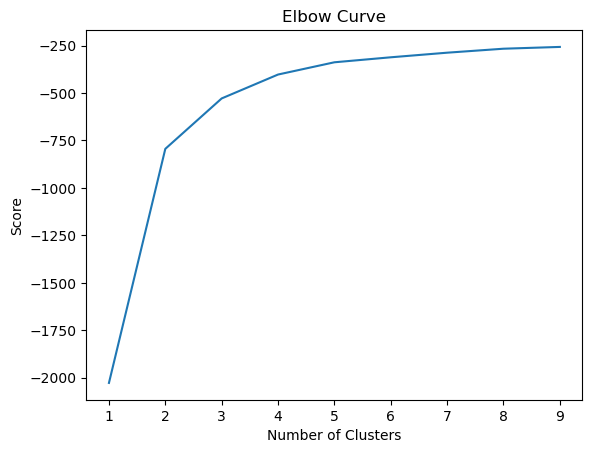

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve seems to straighten out around 5 clusters, so I'll use 5 for my k-means algorithm

## Running k-means Algorithm

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [15]:
# Fit the k-means object to the data.

kmeans.fit(subM)

KMeans(n_clusters=5)

In [17]:
#Create a new clusters column
subM['clusters'] = kmeans.fit_predict(subM)

C:\Users\Rajit\AppData\Local\Temp\ipykernel_1404\4075282401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subM['clusters'] = kmeans.fit_predict(subM)


In [19]:
subM['clusters'].value_counts()

clusters
2    323
1    301
3    282
0    182
4    142
Name: count, dtype: int64

In [20]:
subM.head()

,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to make life choices,Generosity,Perceptions of Corruption,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,0


# 03 Visualizing k-means 

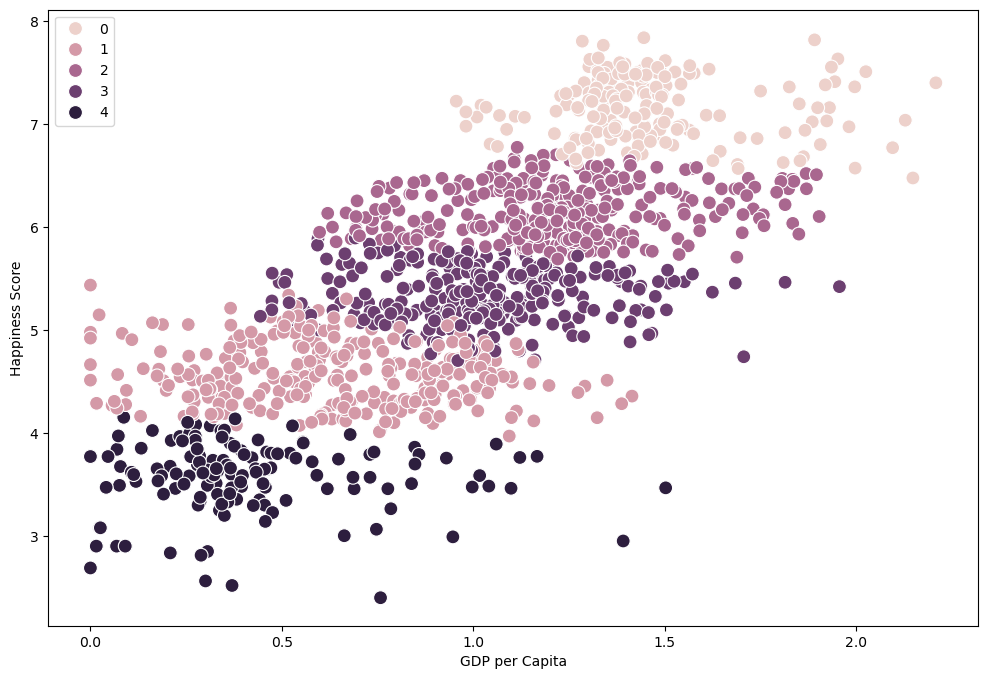

In [22]:
# Plot the clusters for the "Happiness Score" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subM['GDP per Capita'], y=subM['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

Results of GDP per Capita vs Happiness Score. Pleasently surprised by how the clusters turned out. It kinda makes sense how it tiered countries based on Happiness Score 

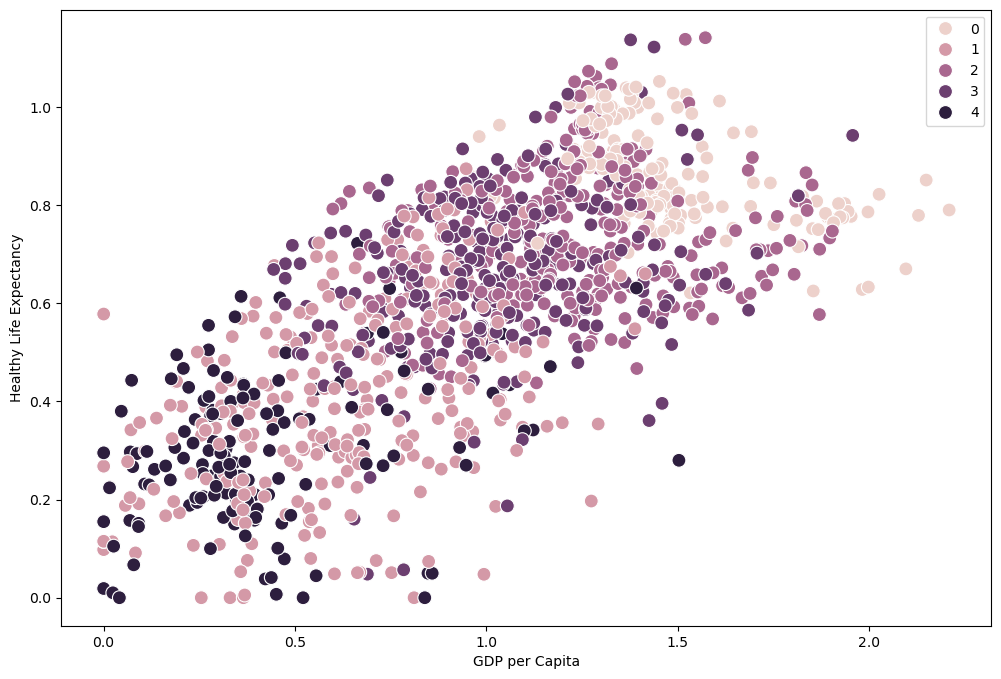

In [23]:
# Plot the clusters for the "Healthy Life Expectancy" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subM['GDP per Capita'], y=subM['Healthy Life Expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Healthy Life Expectancy') # Label y-axis.
plt.show()

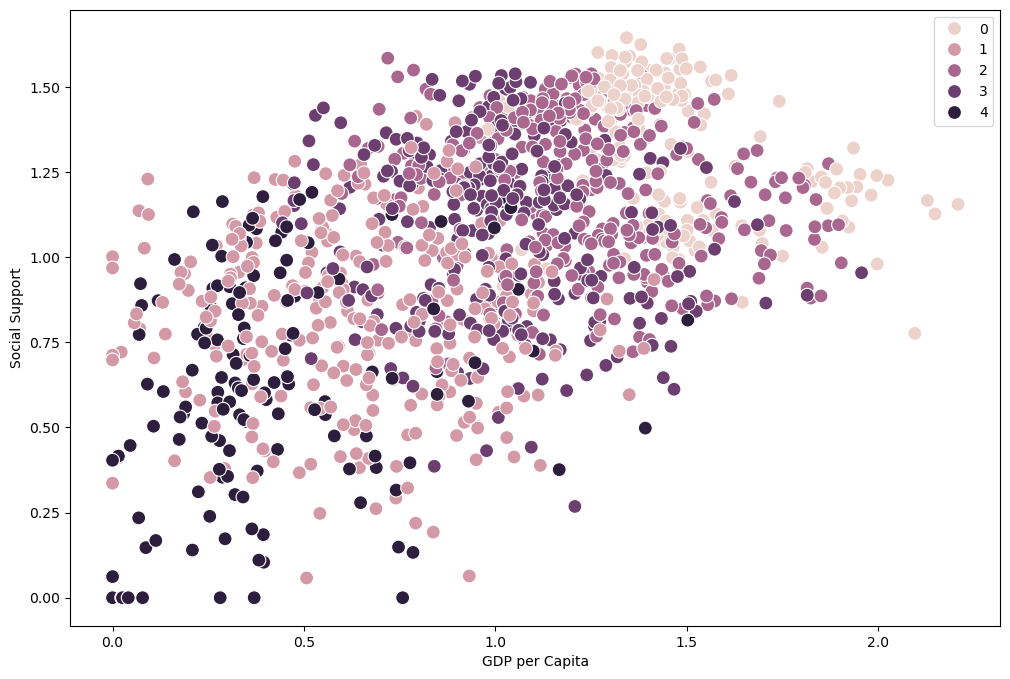

In [24]:
# Plot the clusters for the "Social Support" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subM['GDP per Capita'], y=subM['Social Support'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Social Support') # Label y-axis.
plt.show()

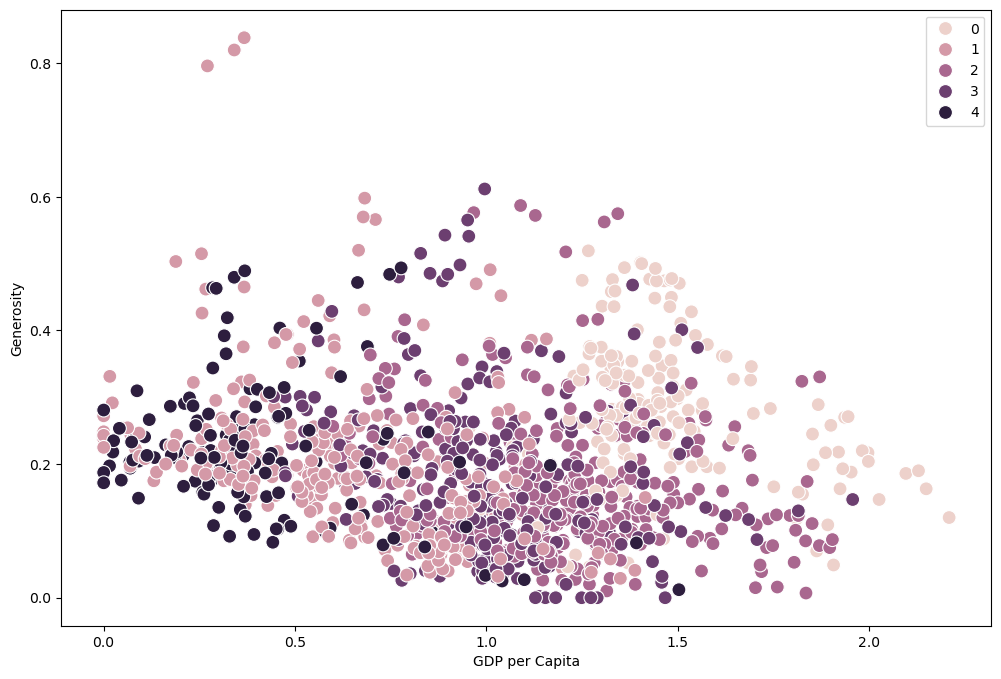

In [26]:
# Plot the clusters for the "Generosity" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subM['GDP per Capita'], y=subM['Generosity'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Generosity') # Label y-axis.
plt.show()

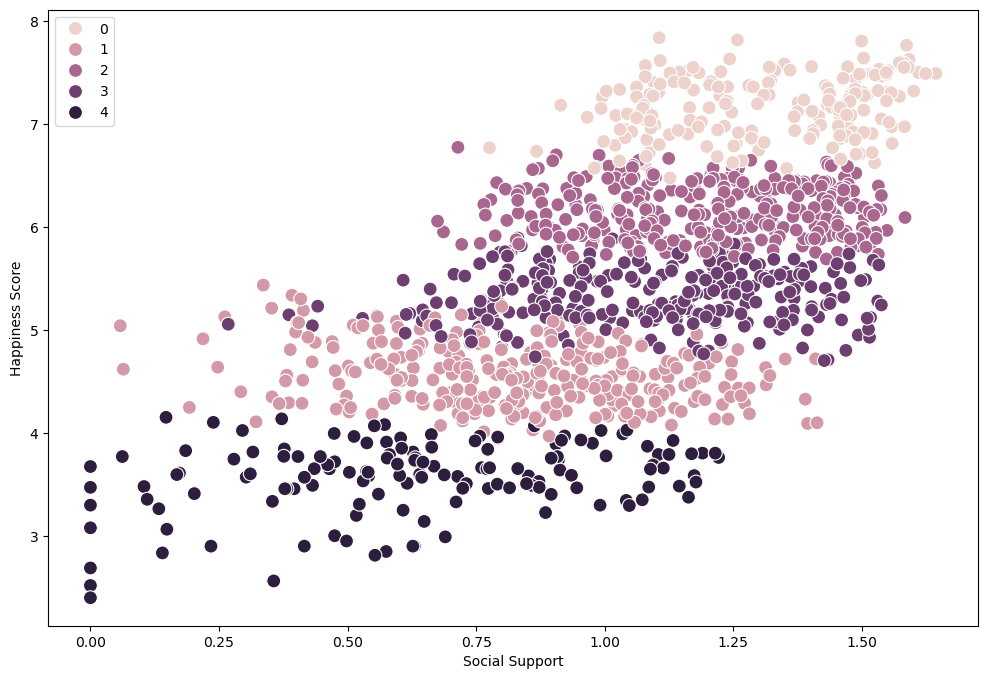

In [25]:
# Plot the clusters for the "Happiness Score" and "Social Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subM['Social Support'], y=subM['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social Support') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

## Descriptive Statistics

In [32]:
subM.loc[subM['clusters'] == 4, 'cluster'] = 'black'
subM.loc[subM['clusters'] == 3, 'cluster'] = 'dark purple '
subM.loc[subM['clusters'] == 2, 'cluster'] = 'purple'
subM.loc[subM['clusters'] == 1, 'cluster'] = 'pink '
subM.loc[subM['clusters'] == 0, 'cluster'] = 'white'

In [33]:
subM.groupby('cluster').agg({'GDP per Capita':['mean', 'median'], 
                         'Healthy Life Expectancy':['mean', 'median'], 
                         'Social Support':['mean', 'median'],
                         'Freedom to make life choices':['mean', 'median'],
                         'Perceptions of Corruption':['mean', 'median'],
                          'Generosity':['mean', 'median']})

GDP per Capita           Healthy Life Expectancy            \
                       mean    median                    mean    median   
cluster                                                                   
black              0.415916  0.348595                0.296971  0.291320   
dark purple        1.019721  1.008482                0.660992  0.657000   
pink               0.642915  0.642000                0.415097  0.401320   
purple             1.221553  1.223000                0.737593  0.723940   
white              1.462048  1.423604                0.858499  0.844488   

             Social Support           Freedom to make life choices            \
                       mean    median                         mean    median   
cluster                                                                        
black              0.632812  0.628577                     0.322843  0.353794   
dark purple        1.082833  1.130682                     0.410413  0.428000   
pink               0.833168  0.848000                     0.376412  0.384000   
purple             1.195589  1.219000                     0.494289  0.505626   
white              1.309856  1.319835                     0.591695  0.600804   

             Perceptions of Corruption           Generosity            
                                  mean    median       mean    median  
cluster                                                                
black                         0.118245  0.094783   0.216439  0.208581  
dark purple                   0.089512  0.071188   0.180042  0.164000  
pink                          0.102774  0.087000   0.205920  0.189870  
purple                        0.109185  0.086000   0.167105  0.144000  
white                         0.288715  0.306000   0.277382  0.274355

## Reflection 

The clusters that made sense were basically the the k-means algorithm clusters based on happiness score (anything with other variables didn't really look clean). It put it in ranges (in both GDP per capita and Social Support) with some slight differences. This is pretty useful because I didn't really think about putting the Happiness Scores into ranges like that. Further for the specific descriptive statistics, I would say that generally with all the variables that influence Happiness Score increase as Happiness Score increases with TWO exceptions. With perceptions of corruption we have a significant difference between the highest (white) compared to the rest of the clusters (almost 3x), this is quite interesting. Second is generosity as we also have the highest value with our highest happiness score (white), but also our second highest came from the lowest happiness score range (black). All in all I found using the k-means algorithm quite interesting, and this will definetly change some of my analysis for the final project.